# Pre-Install
Running the following cell pre-installs what you need. The only exception is graphviz, which we explain further down how to install.

In [1]:
!pip install numpy
!pip install matplotlib
!pip install scikit-learn
!pip install pandas
!pip install pydotplus

# The Hello World of Supervised Learning with python and the sklearn package
This exercise shows the high level interface to supervised learning using Python and Sklearn.

Don't worry if you don't feel you have the full background knowledge yet. We will spend the next many weeks covering supervised learning. This exercise is just to show you a bit of what is coming up ahead.

In supervised learning, we want to learn/approximate some unknown target function $f$ that maps data to whatever value we are interested in.
To achieve this goal we are given a data set $D=\{(x_1,y_1),\dots,(x_n,y_n))\}$ where $y_i = f(x_i)$.

In these exercises, we will focus on classifaction tasks where $f(x_i)\in \{0,\dots,k-1\}$ for a problem with $k$ output classes.
For instance for the problem of Spam Detection, f would be the function that takes as input an email and outputs whether it is spam or not spam.
If we represent an email by a string, then $f$ is a mapping from strings to \{0, 1\}, 0 indicating not spam, and 1 indicating spam.
To learn this function, we are given a list of mails (strings) and associated labels (spam, not spam)

The very basic supervised learning approach is as follows.
* Decide on a (parameterized) set of functions $H$ that we think can be used approximate $f$ on new data. 
* Use a *learning algorithm* on data $D$ to select a good $h\in H$ that approximates $f$ well.
* Apply h on new data that you care about about.

The measure used to select $h \in H$ by the learning algorithm, is defined over the data and designed by the machine learning engineer. It is supposed to encode what a good solution looks like, i.e. what function we prefer over others i.e. a function that minimize a relevant measure on the data, hopefully approximate $f$ well.

For classification problems, a standard quality measure for a classifier is accuracy, i.e. what fraction of data points it manages to correctly classify/predict the label of.

Enough theory talking. Let's demonstrate with some simple python code.

# The Classifier Interface
The function/learning algorithm $h$ is represented as an object that supports at least the methods **fit, predict, and score**.
* fit(X, y), fit the data with learning algorithm on data X with labels y 
* predict(X), return the prediction of the fitted classifer on data points in X
* score(X, y), compute the accuracy of the classifier on data X with labels y

In general $X, y$ will be numpy arrays (a numpy array is a matrix/multidimensional container). With $n$ data points, $X$ is a matrix of shape $(n, d)$ where $d$ is the dimensionality of an input point and $y$ is a numpy array with shape $(n,)$.

As a code example see next cell for the implementation of a very bad classifier.
You should be able to figure out what this classifier does. Run the cell to see output. 

In [2]:
# first some magic functions you can ignore
%matplotlib inline


import numpy as np
class Classifier():
    """ Dummy Classifier Class"""
    def __init__(self):
        self.state = 0
        
    def predict(self, X):
        """ 
        Args:
        @param X, numpy array shape n,d (n input points of dimension d)
        @return, numpy array shape n,  vector of predictions y same length as X
        """
        pred = [self.state for x in X]
        return np.array(pred)
    
    def fit(self, X, y):
        """ Trains the classifier
        Args:
        -----
        @param X, numpy array shape n,d (n input points of dimension d)
        @param y, numpy array shape n,  vector of labels y same length as X
        """
        self.state = y[0]
        return self
    
    def score(self, X, y):
        """ Compute the accuracy of classifier on X, y 
        @param X, numpy array shape n,d (n input points of dimension d)
        @param y, numpy array shape n,  vector of labels y same length as X
        @return float, accuracy of trained classifier on data X, with labels y
        """
        return np.mean(self.predict(X) == y)
    
c = Classifier()
X = np.array([[2,2], [3,2]])
y = np.array([0, 1])
c.fit(X, y)
pred = c.predict(X)
print(pred)
print('The accuracy is', c.score(X, y))

[0 0]
The accuracy is 0.5


# Using a Classifier from the Sklearn Package
Let us experiment with the learning models already made by clever people instead of trying to improve the stupid classifier above.
Below we have added some code for you to start with.
There are two simple utility functions you can ignore, get_2D_data, and visualize2D that generate data, and plot data and classification results resepectively.


The job is simply to use class the *Logistic Regression* model from the Sklearn package, which we will use for classification.  

The gist of it is that an object of the class supports **fit, predict, score** for the machine learning/statistics algorithm known as Logistic Regression.
For a long explanation, see http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Logistic Regression will be covered later in the course.


## Exercise
Complete the **apply_logreg** function by following the description. Run the cell so you can see the result and the visualized decision boundary.


0.864


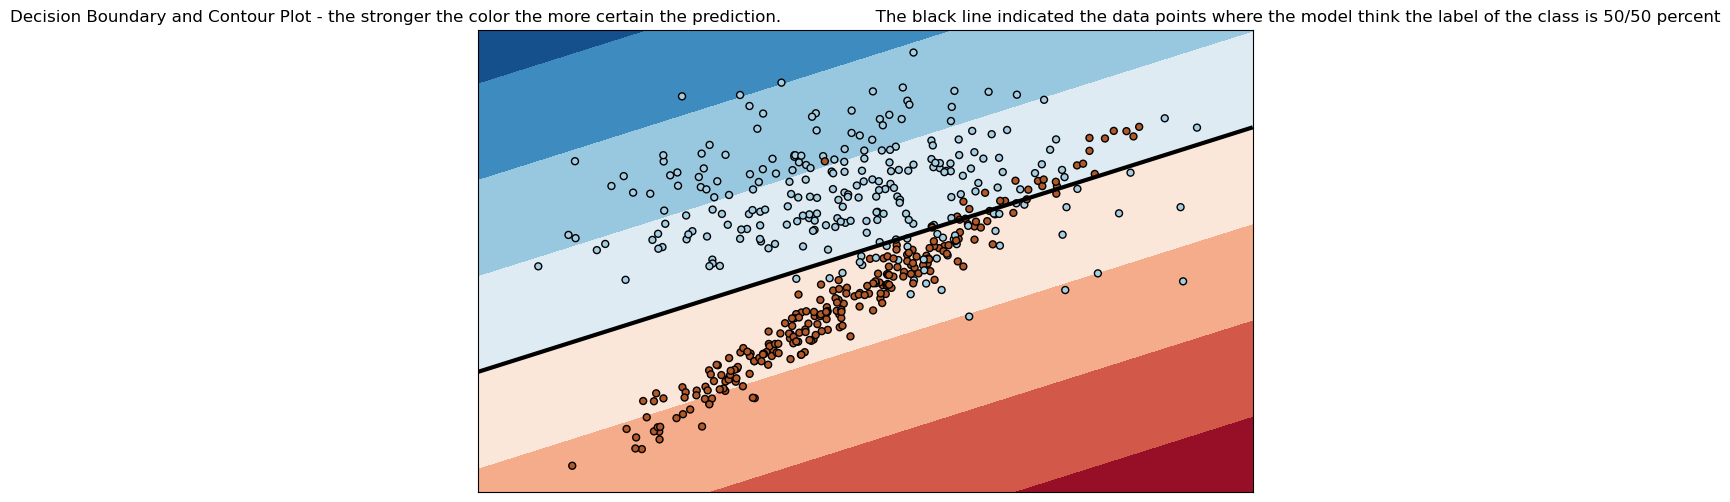

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

def get_2D_data():
    """ Generate a data set to play with"""
    X, y = make_classification(n_samples=500, n_features=2,
                               n_redundant=0, n_informative=2,
                               random_state=0, n_clusters_per_class=1)
    return X, y

def visualize2D(classifier, X, y):
    """ Visualize a 2D classifer on data"""
    h = 0.2
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    fig, ax = plt.subplots(1, 1, figsize=(10,6))
    ax.contourf(xx, yy, Z, cmap=plt.cm.RdBu)
    ax.contour(xx, yy, Z, [0], colors='k', linewidths=3)

    ax.scatter(X[:, 0], X[:, 1], c=1-y, cmap=plt.cm.Paired,
               edgecolors='black', s=25)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title('Decision Boundary and Contour Plot - the stronger the color the more certain the prediction. \
                 The black line indicated the data points where the model think the label of the class is 50/50 percent')
    plt.show()
    
def apply_logreg(feat, labels):
    """ Run a simple (linear) classification model and see the results

    Step 1. Create LogisticRegression classifier object
    Step 2. Fit the data using the fit method
    Step 3. Print the result (use score function on classfier ) on the training data
    Step 4. Return the classifier object
    """
    # knock yourself out
    ### YOUR CODE around 4 lines of code
    clf = LogisticRegression(random_state=0)
    fitclr = clf.fit(feat, labels)
    print(fitclr.score(feat, labels))
    return fitclr
    ### END CODE

feat, labels = get_2D_data()
logistic = apply_logreg(feat, labels)
visualize2D(logistic, feat, labels)
plt.show()

# Let's try a real data set not in 2D
We will take a classic machine learning data set about classifying wine.
See https://archive.ics.uci.edu/ml/datasets/wine for info about the data.
The data set now has 13 features so we cannot really plot in 2 dimensions, and we need to classify them into 3 classes.
We progress nonetheless.

Our goal is not necessarily to get a classifier that is accurate on the training data given to it. Instead, we want it to be accurate on new data. To allow us to measure this "out-of-sample" accuracy, we simply split the training data into two. A **training set** and a **test set**.

We train the classifier on the training set and test the quality of the result on the test set. This loses data for training (bad!), but at least it gives us an estimate of the quality of our learned classification algorithm on new data that was not used for training. The test set can really only be used once, but in this exercise we cheat and use it at least three times.

We will use three different learning models, the Logistic Regression from above, Decision trees, and the famous Neural Nets (all supporting fit, predict, score).
* LogisticRegression:
    http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.decision_function
* DecisionTrees -
    http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
* Neural Nets -
    http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
    May be hard to get good results out of the box! Dont lose to much sleep if the results are not to good.
    
We have three different methods below, one for each classifier type, for you to play with.
To understand decision trees and what it has learned, you can use the visualize tree function that very nicely shows the classifier learned by the decision tree learning algorithm.
It is also possible to try and peek at what the other two learning models learn, but is not as easily readable.


You job is to fill the three training methods.

All learning algorithms have multiple hyperparameters that influence the learning method. Since we have not covered any of them yet, you are only required to try the depth parameter for the trees since that one is fairly easy to understand.

See the description in the underlying function.

Before you knock yourself out, let's take a short look at the data

## The Wine data 

Lets See the Features:
- alcohol
- malic_acid
- ash
- alcalinity_of_ash
- magnesium
- total_phenols
- flavanoids
- nonflavanoid_phenols
- proanthocyanins
- color_intensity
- hue
- od280/od315_of_diluted_wines
- proline

From such data  you must specify one of three wines!!!
******************************
Data Size: 178 So Small!
Lets see the first 10 data points
******************************


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0


******************************
lets plot alcohol and magnesium colored with class


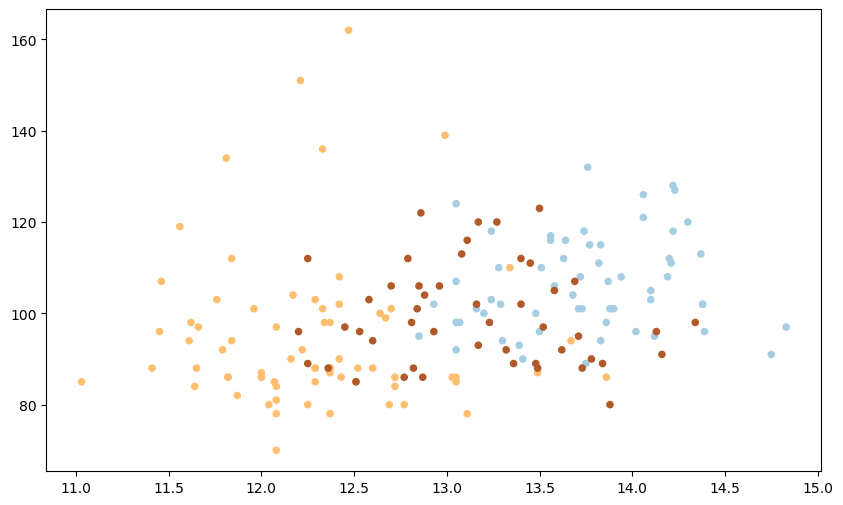

Not an obvious pattern - but some structure it seems - lets learn a classifier instead of fiddling with data


In [4]:
from sklearn.datasets import load_wine
import pandas as pd
from IPython.display import display    
data = load_wine()
print('Lets See the Features:')

for name in data.feature_names:
    print('-', name)    
print('\nFrom such data  you must specify one of three wines!!!')
print('*'*30)
print('Data Size:', data.target.shape[0], 'So Small!')
print('Lets see the first 10 data points')
print('*'*30)
X = data.data
y = data.target
df = pd.DataFrame(X, columns=data.feature_names)
display(df.head(10))
print('*'*30)
print('lets plot alcohol and magnesium colored with class')
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.scatter(X[:,0], X[:,4], c=y, cmap=plt.cm.Paired, s=20)
plt.show()
print('Not an obvious pattern - but some structure it seems - lets learn a classifier instead of fiddling with data')

# Learn to classify wine.
Manually looking at this data and trying to implement a good rule for classifying the data is not fun, 
and this data set is in fact very small and simple...

So machine learning please help.

Your job is to apply machine learning to find a good classifier for wine using the wine data set.
## Exercise
* Complete train_wine_logistic and uncomment the test lines below
* Complete train_wine_dectree and uncomment the test lines below. 
* Complete train_wine_neural_net and uncomment the test lines below. 
  The size of the network is determined by the hidden_layer_sizes parameter but you can use default values.

Which methods seems best for this data set out of the box? (You can run it multiple time with different results due to randomness of the data split).
Can you figure out which features are important for the classification for each model. Could it be important to know the *important* features?

## GraphViz
The sample code below visualizes a decision tree via the GraphViz library. It is not super-important that you have this installed, but we recommend it. If you are using Anaconda (as suggested), you should be able to install it using the command "conda install -c anaconda graphviz". Otherwise, from mac, if you have homebrew installed, you should be able to use the command "brew install graphviz". From Linux, the command "sudo apt-get install graphviz" should work.

******************** Logistic Regression Wine Score ********************
In Sample Score:  0.9849624060150376
Test Score:  0.9333333333333333
Logistic Regreesion Learned Weights: 


/Users/maja/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


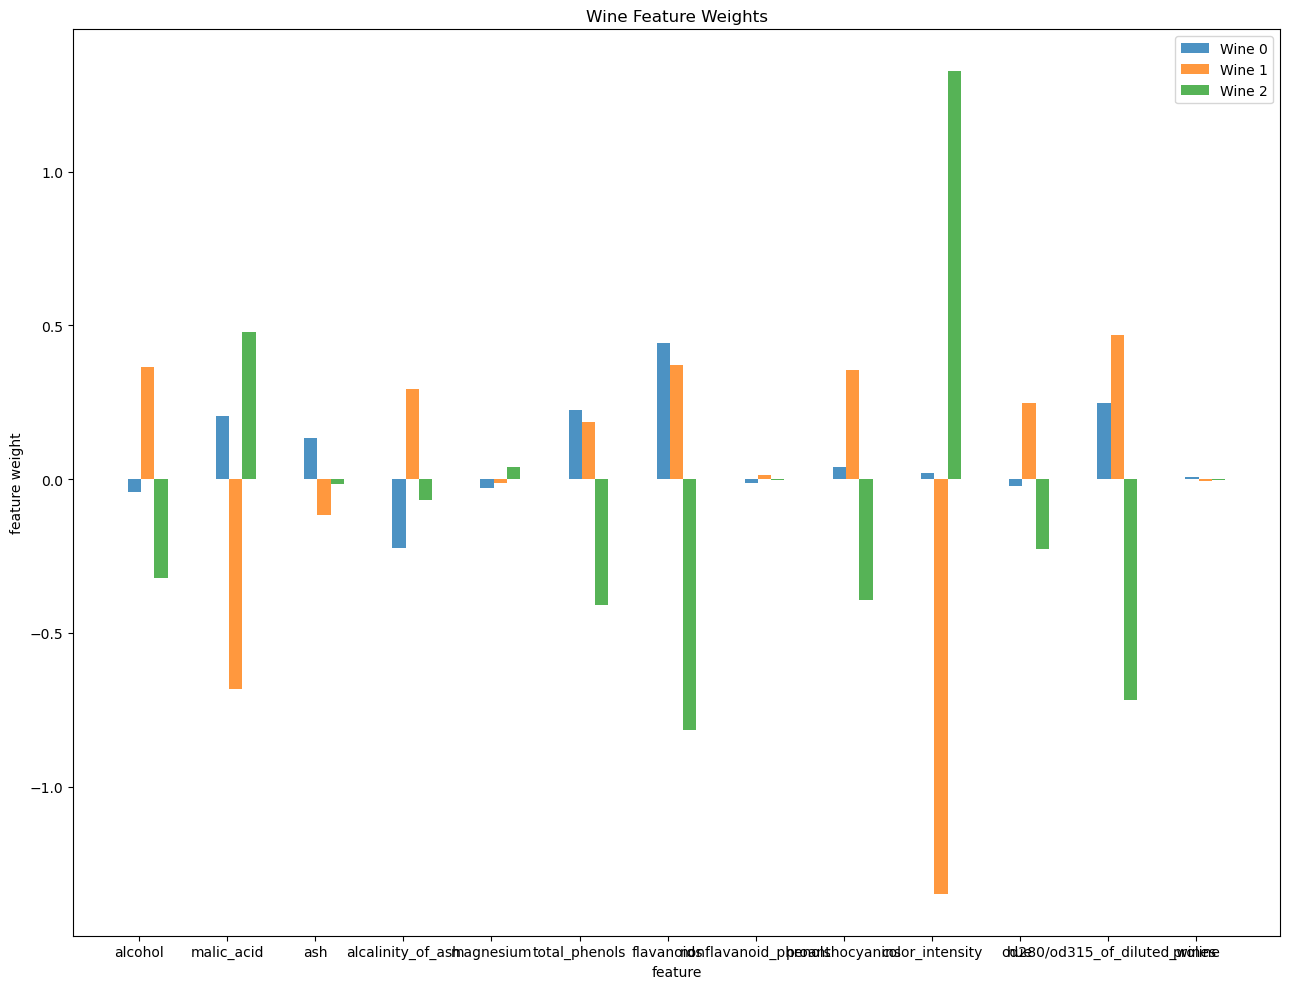

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

 ******************** Decision Tree Wine Score ********************
In Sample Score:  1.0
Test Score:  0.9555555555555556
Lets see the Tree


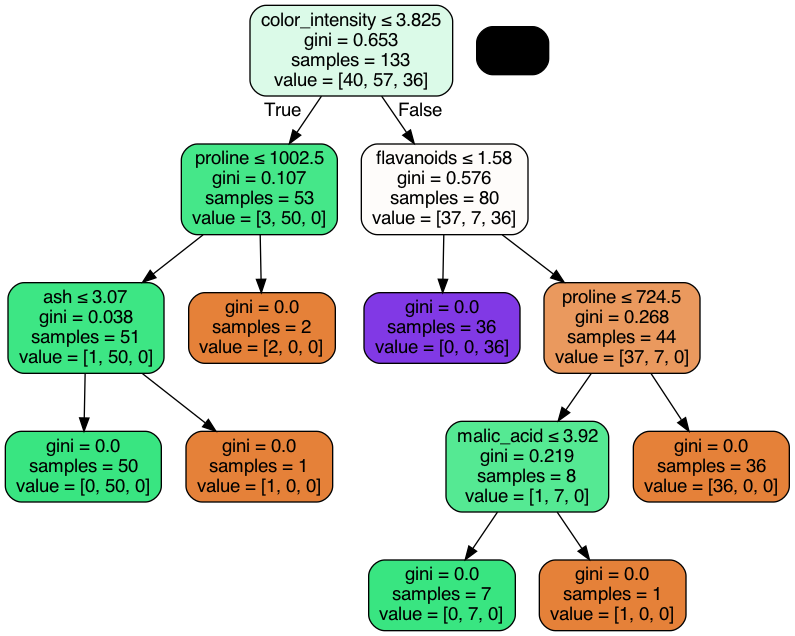


 ******************** Neural Net Wine Score: ********************
In Sample Score:  0.3007518796992481
Test Score:  0.4222222222222222


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
import numpy as np
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

from io import StringIO  
from IPython.display import Image, display
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.model_selection import train_test_split


def bar_plot_weights(weights, names):
    """ Bar plot of weights"""
    features = weights.shape[1]
    classes = weights.shape[0]
    fig, ax = plt.subplots(figsize=(13, 10))
    index = np.arange(features)
    bar_width = 0.15
    opacity = 0.8
    colors = ['r', 'g', 'b']

    for i in range(classes):
        rects2 = plt.bar(index + i * bar_width, weights[i, :], bar_width,
                     alpha=opacity,
                     label='Wine {0}'.format(i))
 
    ax.set_xlabel('feature')
    ax.set_ylabel('feature weight')
    ax.set_title('Wine Feature Weights')
    ax.set_xticks(index + bar_width / 3, names)
    ax.set_xticklabels(names)
    plt.legend()
 
    plt.tight_layout()
    plt.show()

def plot_tree(dtree, feature_names):
    dot_data = StringIO()
    export_graphviz(dtree, out_file=dot_data,
                    filled=True, rounded=True,
                    special_characters=True, feature_names=feature_names)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    img = Image(graph.create_png())
    display(img)


def print_score(classifier, X_train, X_test, y_train, y_test):
    """ Simple print score function that prints train and test score of classifier - almost not worth it"""
    print('In Sample Score: ',
          classifier.score(X_train, y_train))
    print('Test Score: ',
          classifier.score(X_test, y_test))

    
def train_wine_logistic(X_train, y_train):
    """LogisticRegression as before -
        http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.decision_function
        return the trained logistic regression object
        
        For even this simple model there are many choices you can tune, 
        the most important parameter probably being  the C parameter which controls how "complex" we want the function. 
        The smaller C the simpler function. If you like try different value
        
        Step 1. Create LogisticRegression classifier object
        Step 2. Fit the data using the fit method
        Step 3. Return the Classifier
    """
    # Knock your self out
    ### YOUR CODE 3 lines
    return LogisticRegression(random_state=0).fit(X_train, y_train)
    ### END CODE

    
def train_wine_dectree(X_train, y_train, max_depth=5):
    """
    DecisionTrees -
    http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
    
    For this DecisionTree model there are even kmore knobs to turn. But for this exercise you must set the max_depth parameter in the constructor of the classifier 
    and experiment with it a little. It will greatly affect how intricate a function you can learn.
    
    The parameter max_depth can be set in the constructor for the ClassificationTree object (as a named paramater) i.e. t = DecisionTreeClassifier(max_depth=42)
    
    Remember to return the tree.
    
        Step 1. Create DecisionTreeClassifier object
        Step 2. Fit the data using the fit method
        Step 3. Return the classifier 
    """
    # Knock your self out
    ### YOUR CODE 3 lines
    return DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
    ### END CODE

       
def train_wine_neural_net(X_train, y_train):
    """
   Neural Nets -
    http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
    Remember to set the hidden_layer_sizes in the construction i.e. MLPClassifier(hidden_layers_sizes=)
    Otherwise train the MLPclassifer and return it/
    
    May be hard to get good results out of the box! Dont lose to much sleep if the results are not to good.
    Setting other hyperparameters away from standard is probably required... 
    Set batch_size to a small number like 4 or 8 helps significantly
    
        Step 1. Create MPLClassifer  object
        Step 2. Fit the data using the fit method on the data
        Step 3. Return the classifier 
    """
    # Knock your self out
    ### YOUR CODE 3 lines
    return MLPClassifier(random_state=0).fit(X_train, y_train)
    ### END CODE


# the main method here - comment out stuff you do not want to see
## Get Data
data = load_wine()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


## Try logistic regression
head = '*'*20
print(head, 'Logistic Regression Wine Score', head)
logistic = train_wine_logistic(X_train, y_train)
print_score(logistic, X_train, X_test, y_train, y_test)
print('Logistic Regreesion Learned Weights: ')
bar_plot_weights(logistic.coef_, data.feature_names)
print(data.feature_names)

## try different max depth
print('\n', head,'Decision Tree Wine Score', head)
tree = train_wine_dectree(X_train, y_train, max_depth=5)
print_score(tree,  X_train, X_test, y_train, y_test)
print('Lets see the Tree')
plot_tree(tree, data.feature_names)

## Try the famous neural nets
print('\n', head, 'Neural Net Wine Score:', head)
mlp = train_wine_neural_net(X_train, y_train)
print_score(mlp, X_train, X_test, y_train, y_test)
